<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Code-example:-A-MLP-in-Keras" data-toc-modified-id="Code-example:-A-MLP-in-Keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Code example: A MLP in Keras</a></span></li><li><span><a href="#Generating-some-training-data" data-toc-modified-id="Generating-some-training-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generating some training data</a></span></li><li><span><a href="#Building-a-MLP-using-Keras" data-toc-modified-id="Building-a-MLP-using-Keras-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Building a MLP using Keras</a></span></li><li><span><a href="#Training-the-MLP-using-the-training-data" data-toc-modified-id="Training-the-MLP-using-the-training-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training the MLP using the training data</a></span></li><li><span><a href="#Testing-the-trained-MLP-model" data-toc-modified-id="Testing-the-trained-MLP-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing the trained MLP model</a></span></li></ul></div>

# Code example: A MLP in Keras

In this simple example you will see a first MLP implemented using Keras.

# Generating some training data

The following code will generate a 2D matrix X with a random 2D point (x1,x2) in each row.
The 1D matrix Y contains the desired labels. In Y, the corresponding value for (x1,x2) will be 1 if the point (x1,x2) is within a unit circle with radius 0.5 and 0 else.

X has shape (1000, 2)
Y has shape (1000,)
First 10 rows of X:
 [[ 0.01052898  0.28824203]
 [-0.62605944  0.96716856]
 [ 0.34860126  0.81369341]
 [ 0.69274577  0.72614755]
 [-0.65182512  0.97909965]
 [ 0.25373127  0.15081783]
 [ 0.74975508  0.80976858]
 [-0.15546969  0.88543344]
 [-0.00470057 -0.27983272]
 [-0.85635663 -0.76750197]]
First 10 entries of Y:
 [ 1.  0.  0.  0.  0.  1.  0.  0.  1.  0.]


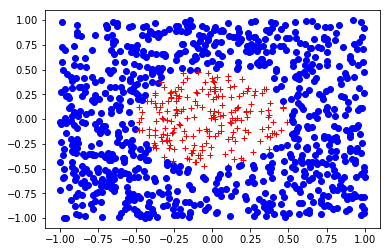

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.uniform(low=-1.0, high=+1.0, size=(1000,2))

Y = np.sqrt(X[:,0]**2 + X[:,1]**2) < 0.5
Y = Y.astype(float)

print("X has shape", X.shape)
print("Y has shape", Y.shape)
print("First 10 rows of X:\n", X[0:10])
print("First 10 entries of Y:\n", Y[0:10])

nr_samples = X.shape[0]
for i in range(0,nr_samples):
    if Y[i] == 1:
        plt.plot(X[i,0], X[i,1], 'r+')
    else:
        plt.plot(X[i,0], X[i,1], 'bo')

plt.show()

# Building a MLP using Keras

Here we generate a MLP with 3 neurons in the first hidden layer, 4 neurons in the second hidden layer, and 1 output neuron.

In [5]:
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(3, activation="relu", input_dim=2))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="linear"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


# Training the MLP using the training data

Now we will train the MLP using both the input matrix X and the desired output matrix Y.

In [12]:
model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(X,Y, epochs=500, verbose=1)

Epoch 1/500
1000/1000 [==============================] - 0s 202us/step - loss: 0.0293
Epoch 2/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.0293
Epoch 3/500
1000/1000 [==============================] - 0s 28us/step - loss: 0.0292
Epoch 4/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.0293
Epoch 5/500
1000/1000 [==============================] - 0s 31us/step - loss: 0.0295
Epoch 6/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.0294
Epoch 7/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.0294
Epoch 8/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.0292
Epoch 9/500
1000/1000 [==============================] - 0s 32us/step - loss: 0.0293
Epoch 10/500
1000/1000 [==============================] - 0s 31us/step - loss: 0.0292
Epoch 11/500
1000/1000 [==============================] - 0s 30us/step - loss: 0.0293
Epoch 12/500
1000/1000 [==============================] - 0s 2

1000/1000 [==============================] - 0s 37us/step - loss: 0.0292
Epoch 97/500
1000/1000 [==============================] - 0s 28us/step - loss: 0.0292
Epoch 98/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.0293
Epoch 99/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.0293
Epoch 100/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.0292
Epoch 101/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.0293
Epoch 102/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.0292
Epoch 103/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.0293
Epoch 104/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.0292
Epoch 105/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.0293
Epoch 106/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.0292
Epoch 107/500
1000/1000 [==============================] - 0

1000/1000 [==============================] - 0s 26us/step - loss: 0.0293
Epoch 191/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.0292
Epoch 192/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.0292
Epoch 193/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.0292
Epoch 194/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.0293
Epoch 195/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.0293
Epoch 196/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.0292
Epoch 197/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.0292
Epoch 198/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.0293
Epoch 199/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.0292
Epoch 200/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.0293
Epoch 201/500
1000/1000 [==============================] 

1000/1000 [==============================] - 0s 28us/step - loss: 0.0292
Epoch 285/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.0293
Epoch 286/500
1000/1000 [==============================] - 0s 32us/step - loss: 0.0293
Epoch 287/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.0293
Epoch 288/500
1000/1000 [==============================] - ETA: 0s - loss: 0.035 - 0s 26us/step - loss: 0.0292
Epoch 289/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.0292
Epoch 290/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.0292
Epoch 291/500
1000/1000 [==============================] - 0s 28us/step - loss: 0.0292
Epoch 292/500
1000/1000 [==============================] - 0s 28us/step - loss: 0.0292
Epoch 293/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.0291
Epoch 294/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.0292
Epoch 295/500
1000/1000 [========

1000/1000 [==============================] - 0s 31us/step - loss: 0.0293
Epoch 379/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.0292
Epoch 380/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.0293
Epoch 381/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.0292
Epoch 382/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.0291
Epoch 383/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.0293
Epoch 384/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.0292
Epoch 385/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.0292
Epoch 386/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.0292
Epoch 387/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.0293
Epoch 388/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.0292
Epoch 389/500
1000/1000 [==============================] 

1000/1000 [==============================] - 0s 26us/step - loss: 0.0292
Epoch 473/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.0292
Epoch 474/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.0293
Epoch 475/500
1000/1000 [==============================] - 0s 25us/step - loss: 0.0293
Epoch 476/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.0293
Epoch 477/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.0292
Epoch 478/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.0292
Epoch 479/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.0292
Epoch 480/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.0293
Epoch 481/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.0293
Epoch 482/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.0292
Epoch 483/500
1000/1000 [==============================] 

# Testing the trained MLP model

We will now use another 1000 new samples to test the MLP. Each of these 1000 examples is classified to be in class red or class blue.

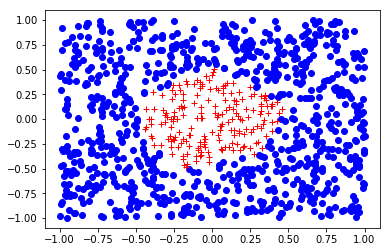

In [13]:
nr_test_samples = 1000

for test_nr in range(0,nr_test_samples):
    x1 = np.random.uniform(low=-1.0, high=+1.0)
    x2 = np.random.uniform(low=-1.0, high=+1.0)   
    vec_x = np.array([[x1, x2]]) 
                           
    output_values = model.predict(vec_x)
    #print(output_values)
    
    if (output_values[0][0] > 0.5):
        plt.plot(x1,x2, 'r+')
    else:
        plt.plot(x1,x2, 'bo')
        
plt.show()    

The results show that the MLP has adapted the weights such that it can roughly classify new points (x1,x2).